In [1]:
#Setting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataframe
df = pd.read_csv (r'C:\Python3\Scripts\titanic-passengers.csv', delimiter = ';')

In [4]:
# print information about the database
#print Head of dataframe
df.head(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Preprocessing

In [5]:
# find missing information
print('Is there missing data in the data frame:', df.isnull().values.any())

print('The columns that have missing data are:', df.columns[df.isnull().any()])        

#count number of missing values
print('The number of missing data is:', df.isnull().sum().sum())

Is there missing data in the data frame: True
The columns that have missing data are: Index(['Age', 'Cabin', 'Embarked'], dtype='object')
The number of missing data is: 866


In [6]:
# replace missing data by the right value
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna('Not Embarked', inplace=True)

#df.head(20)

In [ ]:
#other method to replace the missing data
#for i in df :
    #df[i].fillna('Missing', inplace=True)

In [7]:
# Removing irrelevant data:

df.drop(['Cabin'], axis='columns', inplace=True)

# removed the Cabin column because of the number of missing data compared to total number of rows.

In [8]:
df.drop(['Embarked'], axis='columns', inplace=True)

In [9]:
df.drop(['PassengerId'], axis='columns', inplace=True)

In [10]:
df.drop(['Fare'], axis='columns', inplace=True)

In [11]:
df.drop(['Ticket'], axis='columns', inplace=True)

In [ ]:
#Alternative solution to drop all at once:
#df.drop(['Ticket', 'Fare', 'PassengerId', 'Embarked', 'Cabin'], axis='columns', inplace=True)

#df.head(0)

In [12]:
#Conversion of data:

#convert Survived: 0 = False ; 1 = True
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Survived'] = encoder.fit_transform (df['Survived'])

In [13]:
#convert Sex: 1 = Man ; 0 = Woman
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform (df['Sex'])

# Data Visualization 


c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


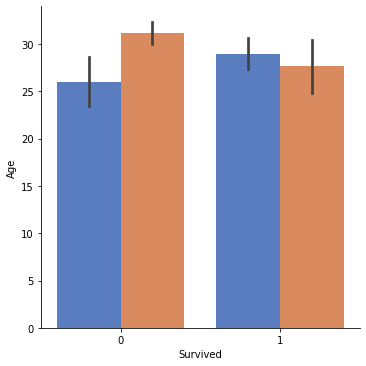

In [14]:
# Set up a factorplot to visualize correlation between Survival, Sex and Age
g = sns.factorplot("Survived", "Age", "Sex", data=df, kind="bar", palette="muted", legend=False)
g

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


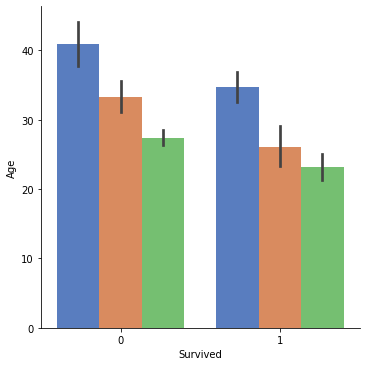

In [15]:
# factorplot to visualize correlation between Survival, Class and Age
h = sns.factorplot("Survived", "Age","Pclass", data=df, kind="bar", palette="muted", legend=False)
h

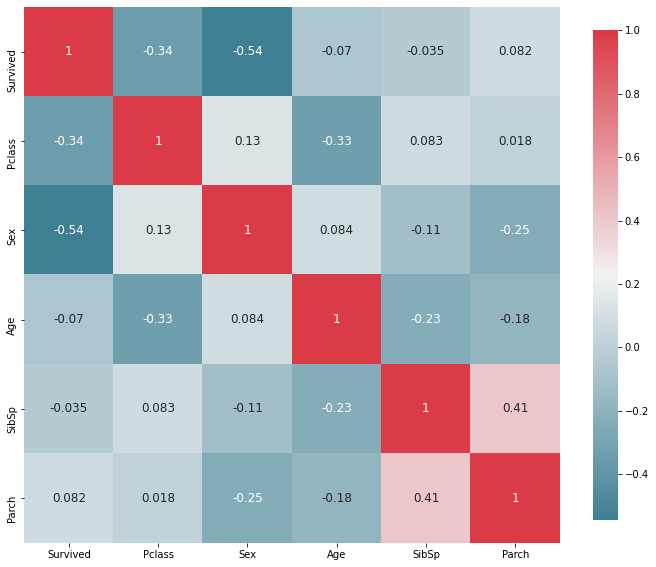

In [16]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)



In [17]:
#The function helps to identify the most relevant data. 
#The graph reprents the correletion between the dufferent data we have.
#It helps to pick which data to study and compare with which other data: 
    #For Example, we can study Parch and SibSp as there is a high correlation score between those enteries 
    #On the oter side there won't be any valuable information to find in studying Parch and Pclass as the correlation is too low

In [47]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
df.groupby(df['Survived']).mean()


,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,2.531876,0.852459,30.415100,0.553734,0.329690
1,1.950292,0.318713,28.549778,0.473684,0.464912


In [ ]:
# print information about the database
df.info()
df.head(5)

In [48]:
#Extraction of the title:

def tit(ch):
    return ch.split(', ')[1].split('. ')[0]

df['Titles'] = df['Name'].map(tit)

In [49]:
# print information about the database
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Titles    891 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(2)
memory usage: 48.9+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Titles
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,Mr


c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


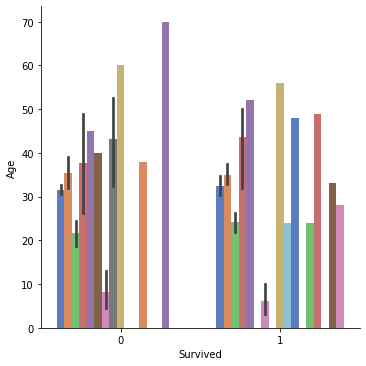

In [50]:
# factorplot to visualize correlation between Survival, Age and Title
i = sns.factorplot("Survived", "Age","Titles", data=df, kind="bar", palette="muted", legend=False)
i

In [ ]:
#Changing the titles into more usefull data:

In [51]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }



In [52]:
df['New_Titles'] = df['Titles'].map(Title_Dictionary)
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Titles,New_Titles
0,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,Mr,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,Mr,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,Mr,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,Mrs,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,Mr,Mrs
5,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.000000,2,0,Mr,Mrs
6,0,3,"Patchett, Mr. George",1,19.000000,0,0,Mr,Mrs
7,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.000000,0,2,Miss,Miss
8,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.500000,0,0,Mr,Mrs
9,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.000000,1,0,Mrs,Mrs


In [53]:
df['New_Titles'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: New_Titles, dtype: int64

c:\python3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


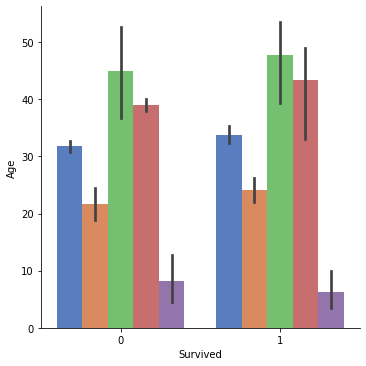

In [54]:
# factorplot to visualize correlation between Survival, Age and Title
j = sns.factorplot("Survived", "Age","New_Titles", data=df, kind="bar", palette="muted", legend=False)
j

In [55]:
#ceating a column for total family members

df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [56]:
# print information about the database
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int32  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Titles       891 non-null    object 
 8   New_Titles   891 non-null    object 
 9   Family_Size  891 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(3)
memory usage: 62.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Titles,New_Titles,Family_Size
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,Mr,Mrs,1
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,Mr,Mrs,1
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,Mr,Mrs,1
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,Mrs,Mrs,5
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,Mr,Mrs,2
